In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Customer Data Pre Processing

In [2]:
!pwd

/Users/harlanhutton/nyu/rds/project/Edelweiss-Foreclosure-probability


In [3]:
cust_data=pd.read_csv("data/Customers_31JAN2019.csv")

In [4]:
cust_data.head()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,12001000,1,5,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
1,12001001,1,5,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.982915,10.0,242703.982915,400070.0
2,12001002,1,7,NaN,50.0,M,M,GRAD,0.0,NaN,NaN,0.000000,NaN,0.000000,400070.0
3,12001003,3,4,NaN,40.0,M,M,GRAD,0.0,NaN,NaN,365263.511624,NaN,365263.516128,400070.0
4,12001004,3,4,NaN,27.0,M,M,GRAD,0.0,NaN,NaN,187342.198995,NaN,187342.198995,400070.0


In [5]:
cust_data.columns

Index(['CUSTOMERID', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID', 'PROFESSION',
       'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION', 'NO_OF_DEPENDENT',
       'OCCUPATION', 'POSITION', 'GROSS_INCOME', 'PRE_JOBYEARS',
       'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dtype='object')

In [6]:
#All values are NA
del cust_data['PROFESSION']
del cust_data['OCCUPATION']

In [7]:
#more than 76% values are NA
del cust_data['POSITION']
del cust_data['PRE_JOBYEARS']

In [8]:
cust_data.columns

Index(['CUSTOMERID', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID', 'AGE', 'SEX',
       'MARITAL_STATUS', 'QUALIFICATION', 'NO_OF_DEPENDENT', 'GROSS_INCOME',
       'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dtype='object')

In [9]:
#Filling NA with mode values
cust_data['SEX']=cust_data['SEX'].fillna('M')

In [10]:
#Filling NA with mode values
cust_data['MARITAL_STATUS']=cust_data['MARITAL_STATUS'].fillna('M')

In [11]:
#Filling NA with mode values
cust_data['NO_OF_DEPENDENT']=cust_data['NO_OF_DEPENDENT'].fillna(0.0)

In [12]:
cust_data['AGE'].mode()

0    34.0
Name: AGE, dtype: float64

In [13]:
#Filling NA with mode values
cust_data['AGE']=cust_data['AGE'].fillna('34.0')

In [14]:
cust_knn_data=cust_data.copy()

# #Using KNN to impute Qualification NA Values

In [15]:
del cust_knn_data['CUSTOMERID']
del cust_knn_data['CUST_CONSTTYPE_ID']
del cust_knn_data['CUST_CATEGORYID']
del cust_knn_data['AGE']
del cust_knn_data['MARITAL_STATUS']
del cust_knn_data['NO_OF_DEPENDENT']
del cust_knn_data['BRANCH_PINCODE']

In [16]:
test=cust_knn_data[cust_knn_data['QUALIFICATION'].isnull()]
train=cust_knn_data[-cust_knn_data['QUALIFICATION'].isnull()]

In [17]:
train['GROSS_INCOME'].groupby(train['QUALIFICATION']).mean()

QUALIFICATION
DOCTRATE    118062.813213
ENG         154885.715120
GRAD        238110.161238
MAT          72369.246949
OTHERS      102848.588674
POSTGRAD    202388.843907
PRF         347811.654845
UG           89866.523717
Name: GROSS_INCOME, dtype: float64

In [18]:
msng_vals=train.isnull().sum()
msng_vals

SEX                  0
QUALIFICATION        0
GROSS_INCOME         0
NETTAKEHOMEINCOME    0
dtype: int64

In [19]:
msng_vals=test.isnull().sum()
msng_vals

SEX                    0
QUALIFICATION        603
GROSS_INCOME           0
NETTAKEHOMEINCOME      0
dtype: int64

In [20]:
test.shape

(603, 4)

In [21]:
train.shape

(9397, 4)

In [22]:
train.head()

,SEX,QUALIFICATION,GROSS_INCOME,NETTAKEHOMEINCOME
0,M,POSTGRAD,198375.221829,198375.221829
1,M,POSTGRAD,242703.982915,242703.982915
2,M,GRAD,0.000000,0.000000
3,M,GRAD,365263.511624,365263.516128
4,M,GRAD,187342.198995,187342.198995


In [23]:
test.head()

,SEX,QUALIFICATION,GROSS_INCOME,NETTAKEHOMEINCOME
31,M,NaN,1.206504e+06,1.206504e+06
37,M,NaN,0.000000e+00,0.000000e+00
60,M,NaN,2.948650e+05,2.948650e+05
61,M,NaN,1.576361e+05,1.576361e+05
63,M,NaN,0.000000e+00,0.000000e+00


In [24]:
train.index=np.arange(0,train.shape[0])
test.index=np.arange(0,test.shape[0])

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['SEX'])
train['SEX']=le.transform(train['SEX'])
test['SEX']=le.transform(test['SEX'])

In [26]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le1.fit(train['QUALIFICATION'])
train['QUALIFICATION']=le1.transform(train['QUALIFICATION'])

In [27]:
#Nearest Neighbour is 2(gives more better distribution)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(train.loc[:,['GROSS_INCOME','NETTAKEHOMEINCOME']], train['QUALIFICATION'])

KNeighborsClassifier(n_neighbors=2)

In [28]:
test['QUALIFICATION']=le1.inverse_transform(neigh.predict(test.loc[:,['GROSS_INCOME','NETTAKEHOMEINCOME']]))

In [29]:
test['GROSS_INCOME'].groupby(test['QUALIFICATION']).mean()

QUALIFICATION
DOCTRATE    131087.144073
GRAD         28757.278180
MAT          81820.621100
OTHERS       45779.173168
POSTGRAD     66569.349281
PRF         120771.097219
UG          125749.381813
Name: GROSS_INCOME, dtype: float64

In [30]:
cust_knn_data['QUALIFICATION']=cust_knn_data['QUALIFICATION'].fillna(test['QUALIFICATION'])

In [31]:
msng_vals=cust_knn_data.isnull().sum()
msng_vals

SEX                    0
QUALIFICATION        553
GROSS_INCOME           0
NETTAKEHOMEINCOME      0
dtype: int64

In [32]:
cust_knn_data.shape

(10000, 4)

In [33]:
cust_data['QUALIFICATION'].head()

0    POSTGRAD
1    POSTGRAD
2        GRAD
3        GRAD
4        GRAD
Name: QUALIFICATION, dtype: object

In [34]:
cust_knn_data['QUALIFICATION'].head()

0    POSTGRAD
1    POSTGRAD
2        GRAD
3        GRAD
4        GRAD
Name: QUALIFICATION, dtype: object

# Copying predicted values to main dataset

In [35]:
cust_data['QUALIFICATION']=cust_knn_data['QUALIFICATION'].copy()

In [36]:
#fill NA values with mode of Branch code
cust_data['BRANCH_PINCODE']=cust_data['BRANCH_PINCODE'].fillna(400070.0)

In [37]:
msng_vals=cust_data.isnull().sum()
msng_vals

CUSTOMERID             0
CUST_CONSTTYPE_ID      0
CUST_CATEGORYID        0
AGE                    0
SEX                    0
MARITAL_STATUS         0
QUALIFICATION        553
NO_OF_DEPENDENT        0
GROSS_INCOME           0
NETTAKEHOMEINCOME      0
BRANCH_PINCODE         0
dtype: int64

# Agreement Data Pre Processing

In [38]:
agree_data=pd.read_csv("data/LMS_31JAN2019.csv")

In [39]:
#agree_data['AGREEMENTID'].value_counts()

In [40]:
agree_data.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.7,10.6,58.0,120,1,...,40.06,39,19.0,0.0,0.6000,HL,10901100.0,NaN,NaN,39
1,11220002,12001001.0,"\t19,290,253.32","\t19,290,253.32",15-Sep-10,13.7,10.6,137.0,180,1,...,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,"\t4,053,498.66","\t4,053,498.66",6-Sep-10,17.2,12.5,360.0,180,5,...,79.34,38,322.0,0.0,0.9100,HL,10901101.0,NaN,NaN,38
3,11220004,12001003.0,"\t13,257,031.92","\t13,257,031.92",29-Sep-10,15.6,10.9,198.0,180,5,...,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN,38
4,11220005,12001004.0,"\t13,211,403.04","\t13,211,403.04",6-Sep-10,16.5,11.9,142.0,180,5,...,40.93,38,104.0,0.0,0.7300,HL,10901101.0,NaN,NaN,38


In [41]:
agree_data.shape

(624250, 38)

In [42]:
agree_data[agree_data['CURRENT_TENOR'].isnull()]

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
286771,11233980,12014979.0,"\t1,544,872.41","\t1,544,872.41",30-Apr-17,15.0,15.0,NaN,180,5,...,34.01,0,NaN,0.0,0.39,STHL,10901298.0,0,0,5
286772,11234225,12015224.0,"\t1,216,235.76","\t1,216,235.76",12-May-17,15.0,15.0,NaN,240,5,...,46.48,0,NaN,0.0,0.40,STHL,10901298.0,0,0,4
416329,11235058,12016057.0,"\t1,157,499.06","\t1,157,499.06",28-Jun-17,13.7,13.7,NaN,180,5,...,62.76,0,NaN,0.0,0.35,STHL,10901285.0,NaN,NaN,11
416997,11238278,12019277.0,"\t1,201,036.64","\t1,201,036.64",13-Nov-17,17.4,17.4,NaN,180,5,...,20.41,0,NaN,0.0,0.35,STHL,10901291.0,NaN,NaN,6
537704,11243831,12024830.0,"\t3,738,226.54","\t3,738,226.54",28-Mar-18,16.2,16.2,NaN,240,5,...,83.52,0,NaN,0.0,0.56,STHL,10901291.0,NaN,NaN,7


In [43]:
#Completed Tenure is 0 so Current Tenure is same as original tenure
print(agree_data.loc[286771,'CURRENT_TENOR'])
print(agree_data.loc[286772,'CURRENT_TENOR'])
print(agree_data.loc[416329,'CURRENT_TENOR'])
print(agree_data.loc[416997,'CURRENT_TENOR'])
print(agree_data.loc[537704,'CURRENT_TENOR'])

nan
nan
nan
nan
nan


In [44]:
agree_data.loc[286771,'CURRENT_TENOR']=agree_data.loc[286771,'ORIGNAL_TENOR']
agree_data.loc[286772,'CURRENT_TENOR']=agree_data.loc[286772,'ORIGNAL_TENOR']
agree_data.loc[416329,'CURRENT_TENOR']=agree_data.loc[416329,'ORIGNAL_TENOR']
agree_data.loc[416997,'CURRENT_TENOR']=agree_data.loc[416997,'ORIGNAL_TENOR']
agree_data.loc[537704,'CURRENT_TENOR']=agree_data.loc[537704,'ORIGNAL_TENOR']

In [45]:
agree_data['CITY'].mode()

0    MUMBAI
Name: CITY, dtype: object

In [46]:
#filling CITY NA values with mode
agree_data['CITY']=agree_data['CITY'].fillna('MUMBAI')

In [47]:
#Completed Tenure is 0 so Balance Tenure is same as Original Tenure
agree_data.loc[286771,'BALANCE_TENURE']=agree_data.loc[286771,'ORIGNAL_TENOR']
agree_data.loc[286772,'BALANCE_TENURE']=agree_data.loc[286772,'ORIGNAL_TENOR']
agree_data.loc[416329,'BALANCE_TENURE']=agree_data.loc[416329,'ORIGNAL_TENOR']
agree_data.loc[416997,'BALANCE_TENURE']=agree_data.loc[416997,'ORIGNAL_TENOR']
agree_data.loc[537704,'BALANCE_TENURE']=agree_data.loc[537704,'ORIGNAL_TENOR']

In [48]:
nagree_data=agree_data.copy()

In [49]:
nagree_data.shape

(624250, 38)

In [50]:
#Filling NA values of Last receipt date by authorization date as completed tenure is 0
for i in nagree_data[nagree_data['LAST_RECEIPT_DATE'].isnull()].index:
    nagree_data.loc[i,'LAST_RECEIPT_DATE']=nagree_data.loc[i,'AUTHORIZATIONDATE']

In [51]:
nagree_data.loc[:,['INTEREST_START_DATE','AUTHORIZATIONDATE','LAST_RECEIPT_DATE']].head()

,INTEREST_START_DATE,AUTHORIZATIONDATE,LAST_RECEIPT_DATE
0,30-Aug-10,29-Aug-10,1-Nov-13
1,15-Sep-10,15-Sep-10,1-Nov-13
2,6-Sep-10,6-Sep-10,5-Nov-13
3,29-Sep-10,29-Sep-10,5-Nov-13
4,6-Sep-10,6-Sep-10,5-Nov-13


In [52]:
nagree_data.loc[:,['LOAN_AMT','NET_DISBURSED_AMT','PRE_EMI_DUEAMT','PRE_EMI_RECEIVED_AMT','EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING','LAST_RECEIPT_AMOUNT']].head()

,LOAN_AMT,NET_DISBURSED_AMT,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_AMOUNT
0,"\t11,710,107.24","\t11,710,107.24",7994.273589,7994.273589,184544.396568,29042.45880,29042.4588,0.00000,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,83559.0
1,"\t19,290,253.32","\t19,290,253.32",100504.575864,100504.575864,279448.084560,0.00000,0.0000,0.00000,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,126530.0
2,"\t4,053,498.66","\t4,053,498.66",0.000000,0.000000,0.000000,0.44171,0.0000,0.44171,-0.441710,3.944954e+06,1.085444e+05,1.549566e+06,3.944954e+06,30898.0
3,"\t13,257,031.92","\t13,257,031.92",28441.732656,28441.732656,0.000000,0.00000,0.0000,0.00000,0.000000,1.030278e+07,2.954253e+06,4.219464e+06,1.255472e+07,88256.0
4,"\t13,211,403.04","\t13,211,403.04",0.000000,0.000000,0.000000,0.00000,0.0000,0.00000,0.000000,8.479158e+06,4.732245e+06,3.812974e+06,1.178201e+07,91892.0


In [53]:
#Filling NA values of Last receipt amoount by pre emi received amount as completed tenure is 0
for i in nagree_data[nagree_data['LAST_RECEIPT_AMOUNT'].isnull()].index:
    nagree_data.loc[i,'LAST_RECEIPT_AMOUNT']=nagree_data.loc[i,'PRE_EMI_RECEIVED_AMT']

In [54]:
nagree_data.shape

(624250, 38)

In [55]:
nagree_data['DPD'].mode()

0    0.0
Name: DPD, dtype: float64

In [56]:
#filling DPD NA values with mode
nagree_data['DPD']=agree_data['DPD'].fillna(0.0)

In [57]:
agree_vals=nagree_data.isnull().sum()
agree_vals

AGREEMENTID                   0
CUSTOMERID                  516
LOAN_AMT                      0
NET_DISBURSED_AMT             0
INTEREST_START_DATE           0
CURRENT_ROI                   0
ORIGNAL_ROI                   0
CURRENT_TENOR                 0
ORIGNAL_TENOR                 0
DUEDAY                        0
AUTHORIZATIONDATE             0
CITY                          0
PRE_EMI_DUEAMT                0
PRE_EMI_RECEIVED_AMT          0
PRE_EMI_OS_AMOUNT             0
EMI_DUEAMT                    0
EMI_RECEIVED_AMT              0
EMI_OS_AMOUNT                 0
EXCESS_AVAILABLE              0
EXCESS_ADJUSTED_AMT           0
BALANCE_EXCESS                0
NET_RECEIVABLE                0
OUTSTANDING_PRINCIPAL         0
PAID_PRINCIPAL                0
PAID_INTEREST                 0
MONTHOPENING                  0
LAST_RECEIPT_DATE             0
LAST_RECEIPT_AMOUNT           0
NET_LTV                       0
COMPLETED_TENURE              0
BALANCE_TENURE                0
DPD     

# Master Dataset

In [58]:
master_data=nagree_data.copy()

In [59]:
master_data.columns

Index(['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT',
       'SCHEMEID', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB'],
      dtype='object')

In [60]:
cust_data.columns

Index(['CUSTOMERID', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID', 'AGE', 'SEX',
       'MARITAL_STATUS', 'QUALIFICATION', 'NO_OF_DEPENDENT', 'GROSS_INCOME',
       'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dtype='object')

In [61]:
master_data=master_data.sort_values(['AGREEMENTID','MOB'])

In [62]:
master_data.head(10)

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.7,10.6,58.0,120,1,...,40.06,39,19.0,0.0,0.60,HL,10901100.0,NaN,NaN,39
2855,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.7,10.6,58.0,120,1,...,40.06,40,18.0,0.0,0.60,HL,10901100.0,NaN,NaN,40
5825,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,41
8928,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,42
12193,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,40.06,43,15.0,0.0,0.60,HL,10901100.0,NaN,NaN,43
15534,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,40.06,44,14.0,0.0,0.60,HL,10901100.0,NaN,NaN,44
18931,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,45.0,120,1,...,40.06,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,45
1,11220002,12001001.0,"\t19,290,253.32","\t19,290,253.32",15-Sep-10,13.7,10.6,137.0,180,1,...,84.31,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,"\t4,053,498.66","\t4,053,498.66",6-Sep-10,17.2,12.5,360.0,180,5,...,79.34,38,322.0,0.0,0.91,HL,10901101.0,NaN,NaN,38
2856,11220003,12001002.0,"\t4,053,498.66","\t4,053,498.66",6-Sep-10,17.2,12.5,360.0,180,5,...,79.34,39,321.0,0.0,0.91,HL,10901101.0,NaN,NaN,39


In [63]:
master_data.shape[0]

624250

In [64]:
master_data.index=np.arange(0,master_data.shape[0])

In [65]:
master_data.head(10)

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.7,10.6,58.0,120,1,...,40.06,39,19.0,0.0,0.60,HL,10901100.0,NaN,NaN,39
1,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.7,10.6,58.0,120,1,...,40.06,40,18.0,0.0,0.60,HL,10901100.0,NaN,NaN,40
2,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,41
3,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,42
4,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,40.06,43,15.0,0.0,0.60,HL,10901100.0,NaN,NaN,43
5,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,40.06,44,14.0,0.0,0.60,HL,10901100.0,NaN,NaN,44
6,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,45.0,120,1,...,40.06,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,45
7,11220002,12001001.0,"\t19,290,253.32","\t19,290,253.32",15-Sep-10,13.7,10.6,137.0,180,1,...,84.31,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN,38
8,11220003,12001002.0,"\t4,053,498.66","\t4,053,498.66",6-Sep-10,17.2,12.5,360.0,180,5,...,79.34,38,322.0,0.0,0.91,HL,10901101.0,NaN,NaN,38
9,11220003,12001002.0,"\t4,053,498.66","\t4,053,498.66",6-Sep-10,17.2,12.5,360.0,180,5,...,79.34,39,321.0,0.0,0.91,HL,10901101.0,NaN,NaN,39


In [66]:
master_data['RANK']=master_data.groupby('AGREEMENTID')['MOB'].rank(ascending=0,method='dense')
master_data['PAYMENTTIMES']=master_data.groupby('AGREEMENTID')['MOB'].rank(ascending=1,method='dense')

In [67]:
master_data.head(8)

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,RANK,PAYMENTTIMES
0,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.7,10.6,58.0,120,1,...,19.0,0.0,0.6,HL,10901100.0,NaN,NaN,39,7.0,1.0
1,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.7,10.6,58.0,120,1,...,18.0,0.0,0.6,HL,10901100.0,NaN,NaN,40,6.0,2.0
2,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,41,5.0,3.0
3,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,42,4.0,4.0
4,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,15.0,0.0,0.6,HL,10901100.0,NaN,NaN,43,3.0,5.0
5,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,58.0,120,1,...,14.0,0.0,0.6,HL,10901100.0,NaN,NaN,44,2.0,6.0
6,11220001,12001000.0,"\t11,710,107.24","\t11,710,107.24",30-Aug-10,13.4,10.6,45.0,120,1,...,0.0,0.0,0.6,HL,10901100.0,NaN,NaN,45,1.0,7.0
7,11220002,12001001.0,"\t19,290,253.32","\t19,290,253.32",15-Sep-10,13.7,10.6,137.0,180,1,...,99.0,0.0,0.6,HL,10901100.0,NaN,NaN,38,1.0,1.0


# Master Data by keeping latest Agreement Info

In [68]:
fmaster_data=master_data[master_data['RANK']==1.0]

In [69]:
fmaster_data.shape

(33354, 40)

In [70]:
fmaster_data.index=np.arange(0,fmaster_data.shape[0])

In [71]:
fmaster_data.columns

Index(['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT',
       'SCHEMEID', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK',
       'PAYMENTTIMES'],
      dtype='object')

In [72]:
train=pd.read_csv("data/train_foreclosure.csv")

In [73]:
test=pd.read_csv("data/test_foreclosure.csv")

In [74]:
train.shape

(20012, 2)

In [75]:
test.shape

(13342, 2)

In [76]:
#Appending train and test
data=train.copy()
data=data.append(test)
data.shape

(33354, 2)

In [77]:
#Merging Train and Test Foreclosure with Agreement
fmaster_data=pd.merge(fmaster_data,data,how='left',on='AGREEMENTID')

In [78]:
#Merging Cust_data with Agreement
fmaster_data=pd.merge(fmaster_data,cust_data,how='left',on='CUSTOMERID')

In [79]:
fmaster_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            33344, 33345, 33346, 33347, 33348, 33349, 33350, 33351, 33352,
            33353],
           dtype='int64', length=33354)

In [80]:
fmaster_data.shape

(33354, 51)

In [81]:
#Replacing Yes with 1 and #N/ with 0
fmaster_data['NPA_IN_LAST_MONTH']=fmaster_data['NPA_IN_LAST_MONTH'].replace('Yes',1)
fmaster_data['NPA_IN_LAST_MONTH']=fmaster_data['NPA_IN_LAST_MONTH'].replace('#N/',0)
fmaster_data['NPA_IN_LAST_MONTH']=fmaster_data['NPA_IN_LAST_MONTH'].replace('0',0)

In [82]:
#Filling NA values of NPA_IN_LAST_MONTH with mode values
fmaster_data['NPA_IN_LAST_MONTH']=fmaster_data['NPA_IN_LAST_MONTH'].fillna(0)

In [83]:
fmaster_data['NPA_IN_LAST_MONTH'].value_counts()

0.0    33329
1.0       25
Name: NPA_IN_LAST_MONTH, dtype: int64

In [84]:
#Replacing Yes with 1 and #N/ with 0
fmaster_data['NPA_IN_CURRENT_MONTH']=fmaster_data['NPA_IN_CURRENT_MONTH'].replace('Yes',1)
fmaster_data['NPA_IN_CURRENT_MONTH']=fmaster_data['NPA_IN_CURRENT_MONTH'].replace('0',0)

In [85]:
#Filling NA values of NPA_IN_CURRENT_MONTH with mode values
fmaster_data['NPA_IN_CURRENT_MONTH']=fmaster_data['NPA_IN_CURRENT_MONTH'].fillna(0)

In [86]:
fmaster_data['NPA_IN_CURRENT_MONTH'].value_counts()

0.0    33327
1.0       27
Name: NPA_IN_CURRENT_MONTH, dtype: int64

In [87]:
fmaster_data.columns

Index(['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT',
       'SCHEMEID', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK',
       'PAYMENTTIMES', 'FORECLOSURE', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID',
       'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION', 'NO_OF_DEPENDENT',
       'GROSS_INCOME', 'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dtype='object')

In [88]:
fmaster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33354 entries, 0 to 33353
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGREEMENTID            33354 non-null  int64  
 1   CUSTOMERID             32895 non-null  float64
 2   LOAN_AMT               33354 non-null  object 
 3   NET_DISBURSED_AMT      33354 non-null  object 
 4   INTEREST_START_DATE    33354 non-null  object 
 5   CURRENT_ROI            33354 non-null  float64
 6   ORIGNAL_ROI            33354 non-null  float64
 7   CURRENT_TENOR          33354 non-null  float64
 8   ORIGNAL_TENOR          33354 non-null  int64  
 9   DUEDAY                 33354 non-null  int64  
 10  AUTHORIZATIONDATE      33354 non-null  object 
 11  CITY                   33354 non-null  object 
 12  PRE_EMI_DUEAMT         33354 non-null  float64
 13  PRE_EMI_RECEIVED_AMT   33354 non-null  float64
 14  PRE_EMI_OS_AMOUNT      33354 non-null  float64
 15  EM

In [89]:
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
le2.fit(fmaster_data['CITY'])
fmaster_data['CITY']=le2.transform(fmaster_data['CITY'])

In [90]:
fmaster_data['PRODUCT'].nunique()

4

In [91]:
fmaster_data.shape

(33354, 51)

In [92]:
fmaster_data=pd.get_dummies(fmaster_data, prefix=['PRODUCT'], columns=['PRODUCT'])

In [93]:
fmaster_data.shape

(33354, 54)

In [94]:
dtest=fmaster_data[fmaster_data['FORECLOSURE'].isnull()]
dtrain=fmaster_data[-fmaster_data['FORECLOSURE'].isnull()]

In [95]:
print(dtest.shape)
print(dtrain.shape)

(13342, 54)
(20012, 54)


# 2 types of final data one with only agreement info and other alongwith customer info

In [96]:
train_wc=dtrain.copy()

In [97]:
test_wc=dtest.copy()

In [98]:
del train_wc['CUSTOMERID']
del train_wc['SCHEMEID']
del train_wc['CUST_CONSTTYPE_ID']
del train_wc['CUST_CATEGORYID']
del train_wc['AGE']
del train_wc['SEX']
del train_wc['MARITAL_STATUS']
del train_wc['QUALIFICATION']
del train_wc['NO_OF_DEPENDENT']
del train_wc['GROSS_INCOME']
del train_wc['NETTAKEHOMEINCOME']
del train_wc['BRANCH_PINCODE']
del test_wc['CUSTOMERID']
del test_wc['SCHEMEID']
del test_wc['CUST_CONSTTYPE_ID']
del test_wc['CUST_CATEGORYID']
del test_wc['AGE']
del test_wc['SEX']
del test_wc['MARITAL_STATUS']
del test_wc['QUALIFICATION']
del test_wc['NO_OF_DEPENDENT']
del test_wc['GROSS_INCOME']
del test_wc['NETTAKEHOMEINCOME']
del test_wc['BRANCH_PINCODE']

In [99]:
print(train_wc.shape)
print(test_wc.shape)

(20012, 42)
(13342, 42)


In [100]:
train_wc.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'INTEREST_START_DATE',
       'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR',
       'DUEDAY', 'AUTHORIZATIONDATE', 'CITY', 'PRE_EMI_DUEAMT',
       'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT',
       'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR',
       'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK',
       'PAYMENTTIMES', 'FORECLOSURE', 'PRODUCT_HL', 'PRODUCT_LAP',
       'PRODUCT_STHL', 'PRODUCT_STLAP'],
      dtype='object')

In [101]:
train_c=dtrain.copy()
test_c=dtest.copy()
print(train_c.shape)
print(test_c.shape)

(20012, 54)
(13342, 54)


In [102]:
train_c=train_c.dropna()
print(train_c.shape)

(5652, 54)


In [103]:
del test_c['FORECLOSURE']
test_c=test_c.dropna()

In [104]:
print(test_c.shape)

(3795, 53)


In [105]:
train_c.shape

(5652, 54)

In [106]:
#Coverting to datetime format
train_wc['INTEREST_START_DATE']=pd.to_datetime(train_wc['INTEREST_START_DATE'])
train_wc['AUTHORIZATIONDATE']=pd.to_datetime(train_wc['AUTHORIZATIONDATE'])
train_wc['LAST_RECEIPT_DATE']=pd.to_datetime(train_wc['LAST_RECEIPT_DATE'])

test_wc['INTEREST_START_DATE']=pd.to_datetime(test_wc['INTEREST_START_DATE'])
test_wc['AUTHORIZATIONDATE']=pd.to_datetime(test_wc['AUTHORIZATIONDATE'])
test_wc['LAST_RECEIPT_DATE']=pd.to_datetime(test_wc['LAST_RECEIPT_DATE'])

In [107]:
#Stripping date into year month and day
train_wc['INTEREST_START_YEAR'] = train_wc['INTEREST_START_DATE'].dt.year
train_wc['INTEREST_START_MONTH'] = train_wc['INTEREST_START_DATE'].dt.month
train_wc['INTEREST_START_DAY'] = train_wc['INTEREST_START_DATE'].dt.day
train_wc['AUTHORIZATION_YEAR'] = train_wc['AUTHORIZATIONDATE'].dt.year
train_wc['AUTHORIZATION_MONTH'] = train_wc['AUTHORIZATIONDATE'].dt.month
train_wc['AUTHORIZATION_DAY'] = train_wc['AUTHORIZATIONDATE'].dt.day
train_wc['LAST_RECEIPT_YEAR'] = train_wc['LAST_RECEIPT_DATE'].dt.year
train_wc['LAST_RECEIPT_MONTH'] = train_wc['LAST_RECEIPT_DATE'].dt.month
train_wc['LAST_RECEIPT_DAY'] = train_wc['LAST_RECEIPT_DATE'].dt.day

test_wc['INTEREST_START_YEAR'] = test_wc['INTEREST_START_DATE'].dt.year
test_wc['INTEREST_START_MONTH'] = test_wc['INTEREST_START_DATE'].dt.month
test_wc['INTEREST_START_DAY'] = test_wc['INTEREST_START_DATE'].dt.day
test_wc['AUTHORIZATION_YEAR'] = test_wc['AUTHORIZATIONDATE'].dt.year
test_wc['AUTHORIZATION_MONTH'] = test_wc['AUTHORIZATIONDATE'].dt.month
test_wc['AUTHORIZATION_DAY'] = test_wc['AUTHORIZATIONDATE'].dt.day
test_wc['LAST_RECEIPT_YEAR'] = test_wc['LAST_RECEIPT_DATE'].dt.year
test_wc['LAST_RECEIPT_MONTH'] = test_wc['LAST_RECEIPT_DATE'].dt.month
test_wc['LAST_RECEIPT_DAY'] = test_wc['LAST_RECEIPT_DATE'].dt.day

In [108]:
train_wc['TARGET']=train_wc['FORECLOSURE']

In [109]:
del train_wc['FORECLOSURE']

In [110]:
del train_wc['INTEREST_START_DATE']
del train_wc['AUTHORIZATIONDATE']
del train_wc['LAST_RECEIPT_DATE']

In [111]:
del test_wc['INTEREST_START_DATE']
del test_wc['AUTHORIZATIONDATE']
del test_wc['LAST_RECEIPT_DATE']

In [112]:
del test_wc['FORECLOSURE']

In [113]:
train_wc.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK', 'PAYMENTTIMES', 'PRODUCT_HL',
       'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'INTEREST_START_YEAR',
       'INTEREST_START_MONTH', 'INTEREST_START_DAY', 'AUTHORIZATION_YEAR',
       'AUTHORIZATION_MONTH', 'AUTHORIZATION_DAY', 'LAST_RECEIPT_YEAR',
       'LAST_RECEIPT_MONTH', 'LAST_RECEIPT_DAY', 'TARGET'],
      dtype='object')

In [114]:
test_wc.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK', 'PAYMENTTIMES', 'PRODUCT_HL',
       'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'INTEREST_START_YEAR',
       'INTEREST_START_MONTH', 'INTEREST_START_DAY', 'AUTHORIZATION_YEAR',
       'AUTHORIZATION_MONTH', 'AUTHORIZATION_DAY', 'LAST_RECEIPT_YEAR',
       'LAST_RECEIPT_MONTH', 'LAST_RECEIPT_DAY'],
      dtype='object')

In [115]:
print(train_wc.shape)
print(test_wc.shape)

(20012, 48)
(13342, 47)


In [116]:
master_vals=test_wc.isnull().sum()
master_vals

AGREEMENTID              0
LOAN_AMT                 0
NET_DISBURSED_AMT        0
CURRENT_ROI              0
ORIGNAL_ROI              0
CURRENT_TENOR            0
ORIGNAL_TENOR            0
DUEDAY                   0
CITY                     0
PRE_EMI_DUEAMT           0
PRE_EMI_RECEIVED_AMT     0
PRE_EMI_OS_AMOUNT        0
EMI_DUEAMT               0
EMI_RECEIVED_AMT         0
EMI_OS_AMOUNT            0
EXCESS_AVAILABLE         0
EXCESS_ADJUSTED_AMT      0
BALANCE_EXCESS           0
NET_RECEIVABLE           0
OUTSTANDING_PRINCIPAL    0
PAID_PRINCIPAL           0
PAID_INTEREST            0
MONTHOPENING             0
LAST_RECEIPT_AMOUNT      0
NET_LTV                  0
COMPLETED_TENURE         0
BALANCE_TENURE           0
DPD                      0
FOIR                     0
NPA_IN_LAST_MONTH        0
NPA_IN_CURRENT_MONTH     0
MOB                      0
RANK                     0
PAYMENTTIMES             0
PRODUCT_HL               0
PRODUCT_LAP              0
PRODUCT_STHL             0
P

In [117]:
# HARLAN WROTE THIS!

train_wc['LOAN_AMT'] = train_wc['LOAN_AMT'].str.replace('\t', '').str.replace(',','').str.replace(' ','').astype(float)
train_wc['NET_DISBURSED_AMT'] = train_wc['NET_DISBURSED_AMT'].str.replace('\t', '').str.replace(',','').str.replace(' ','').astype(float)

LOAN_AMT


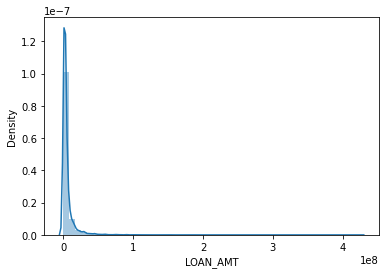

NET_DISBURSED_AMT


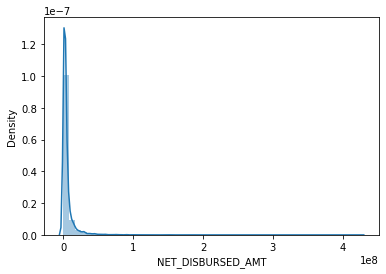

CURRENT_ROI


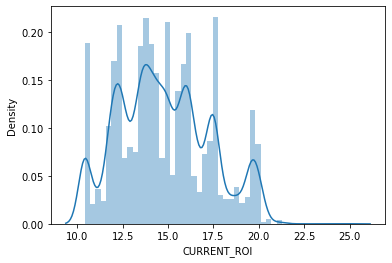

ORIGNAL_ROI


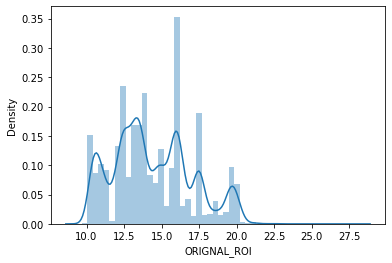

CURRENT_TENOR


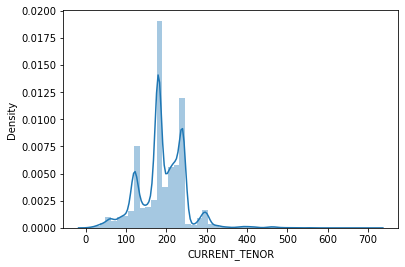

ORIGNAL_TENOR


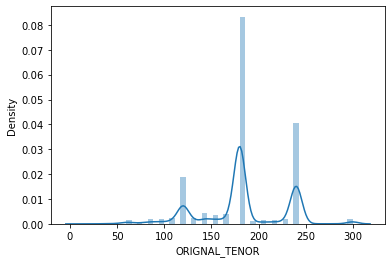

DUEDAY


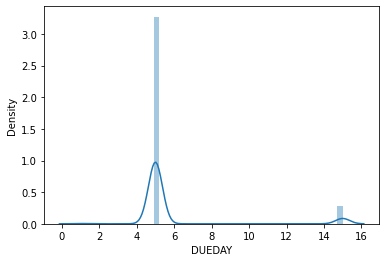

CITY


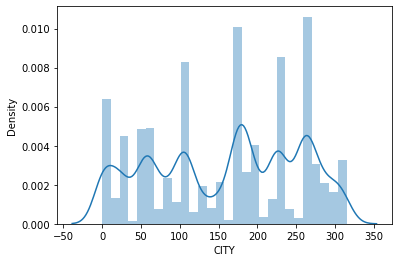

PRE_EMI_DUEAMT


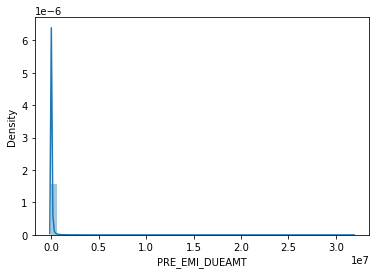

PRE_EMI_RECEIVED_AMT


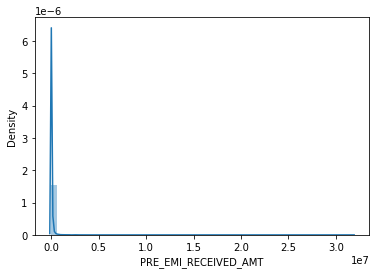

PRE_EMI_OS_AMOUNT


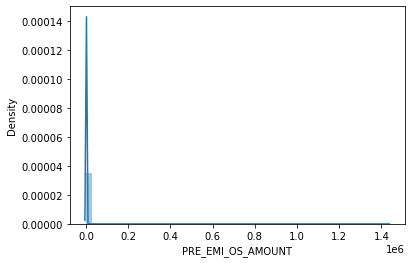

EMI_DUEAMT


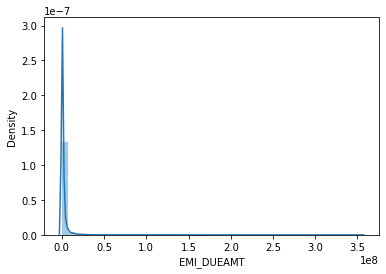

EMI_RECEIVED_AMT


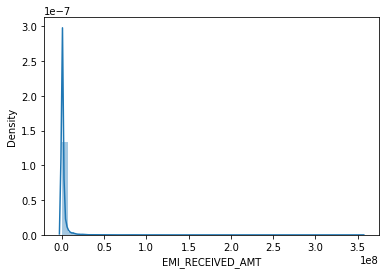

EMI_OS_AMOUNT


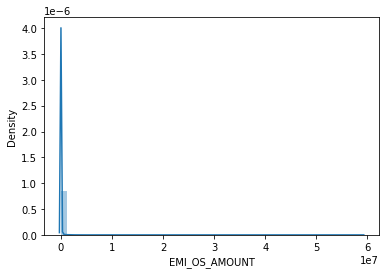

EXCESS_AVAILABLE


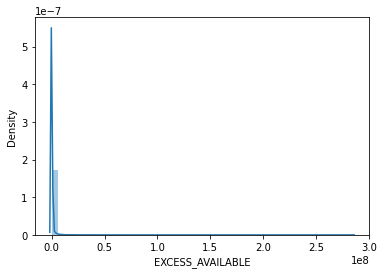

EXCESS_ADJUSTED_AMT


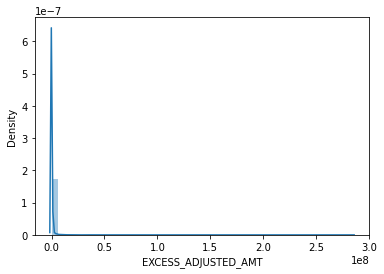

BALANCE_EXCESS


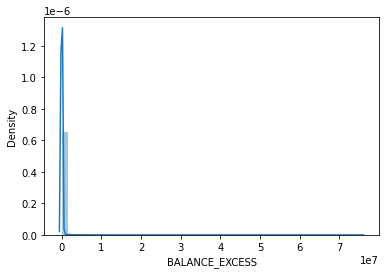

NET_RECEIVABLE


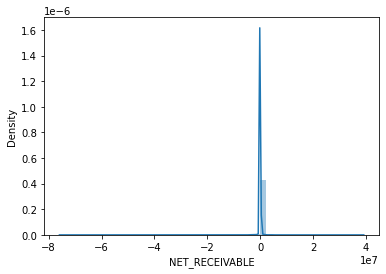

OUTSTANDING_PRINCIPAL


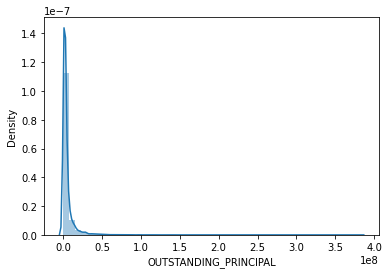

PAID_PRINCIPAL


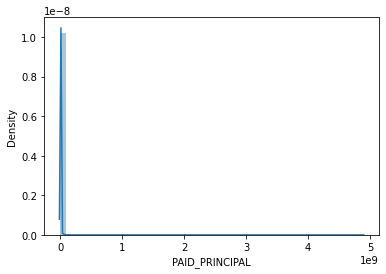

PAID_INTEREST


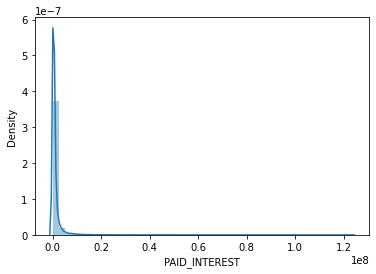

MONTHOPENING


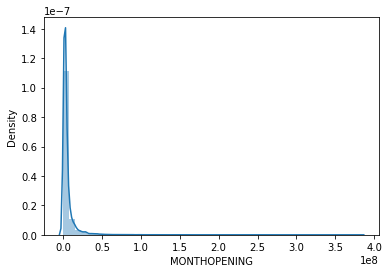

LAST_RECEIPT_AMOUNT


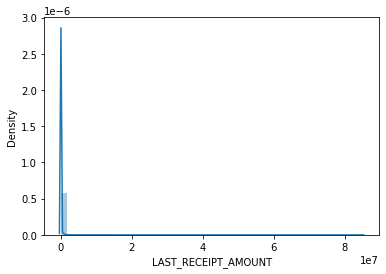

NET_LTV


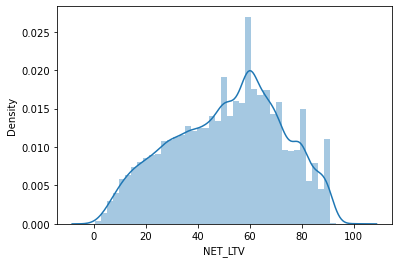

COMPLETED_TENURE


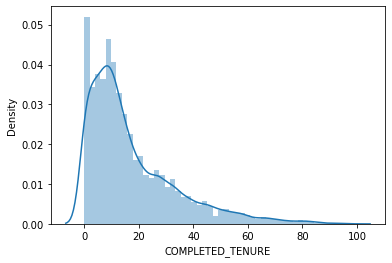

BALANCE_TENURE


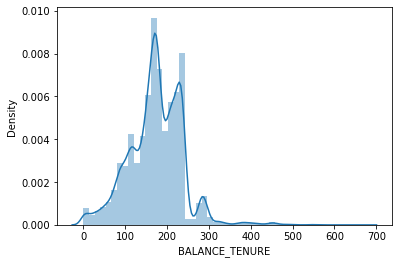

DPD


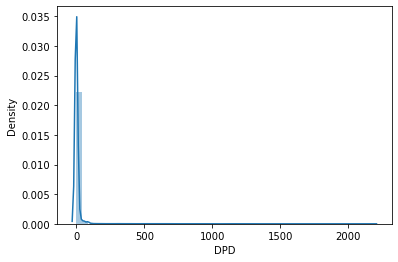

FOIR


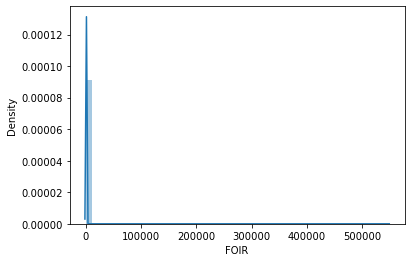

NPA_IN_LAST_MONTH


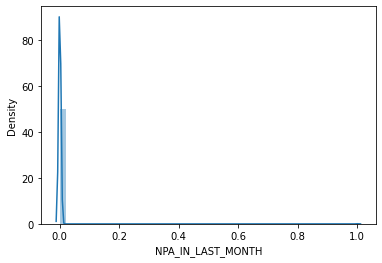

NPA_IN_CURRENT_MONTH


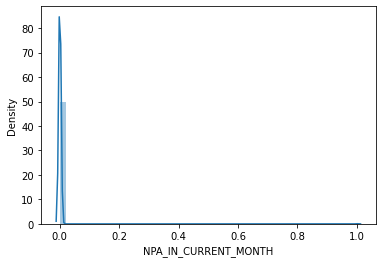

MOB


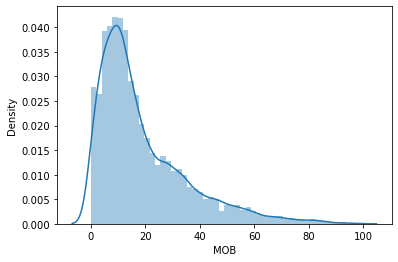

RANK


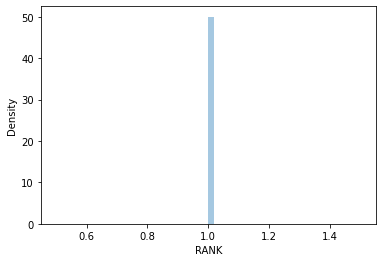

PAYMENTTIMES


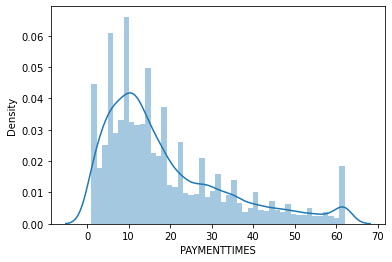

PRODUCT_HL


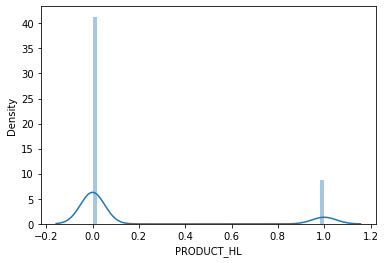

PRODUCT_LAP


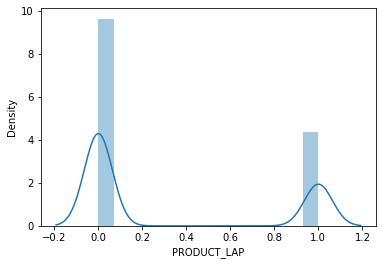

PRODUCT_STHL


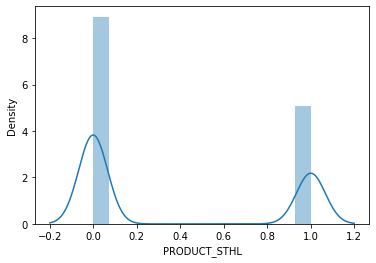

PRODUCT_STLAP


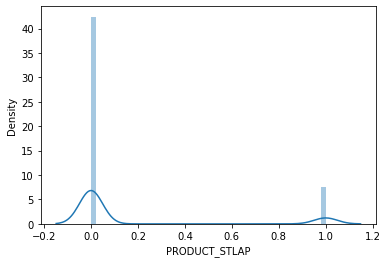

INTEREST_START_YEAR


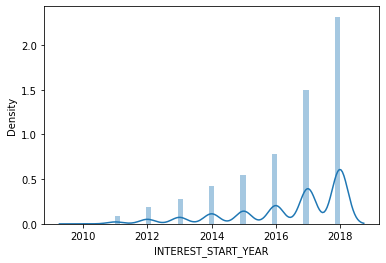

INTEREST_START_MONTH


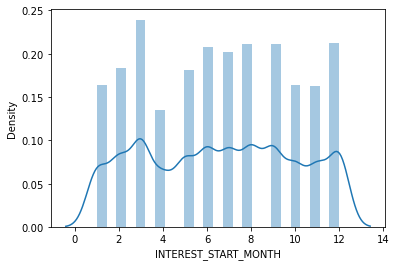

INTEREST_START_DAY


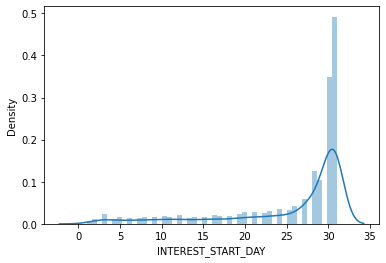

AUTHORIZATION_YEAR


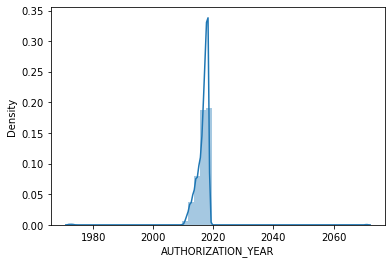

AUTHORIZATION_MONTH


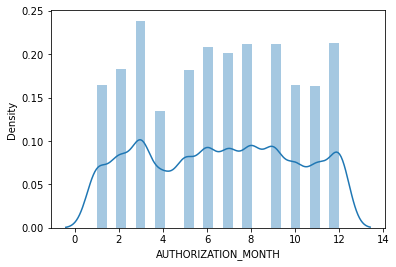

AUTHORIZATION_DAY


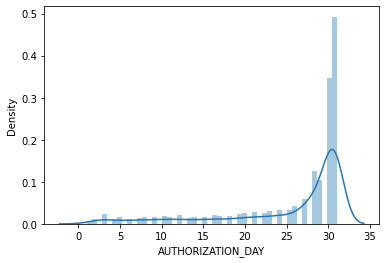

In [118]:
#scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
for col in train_wc.iloc[:,1:44].columns:
    print(col)
    sns.distplot(train_wc[col])
    plt.show()

In [119]:
train_wc.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK', 'PAYMENTTIMES', 'PRODUCT_HL',
       'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'INTEREST_START_YEAR',
       'INTEREST_START_MONTH', 'INTEREST_START_DAY', 'AUTHORIZATION_YEAR',
       'AUTHORIZATION_MONTH', 'AUTHORIZATION_DAY', 'LAST_RECEIPT_YEAR',
       'LAST_RECEIPT_MONTH', 'LAST_RECEIPT_DAY', 'TARGET'],
      dtype='object')

In [120]:
test_wc.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK', 'PAYMENTTIMES', 'PRODUCT_HL',
       'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'INTEREST_START_YEAR',
       'INTEREST_START_MONTH', 'INTEREST_START_DAY', 'AUTHORIZATION_YEAR',
       'AUTHORIZATION_MONTH', 'AUTHORIZATION_DAY', 'LAST_RECEIPT_YEAR',
       'LAST_RECEIPT_MONTH', 'LAST_RECEIPT_DAY'],
      dtype='object')

In [121]:
#Log Transoformation
ltrain_wc=train_wc.copy()
ltest_wc=test_wc.copy()

In [ ]:
ltrain_wc['LOAN_AMT']=np.log(train_wc['LOAN_AMT'])
ltest_wc['LOAN_AMT']=np.log(test_wc['LOAN_AMT'])
ltrain_wc['NET_DISBURSED_AMT']=np.log(train_wc['NET_DISBURSED_AMT'])
ltest_wc['NET_DISBURSED_AMT']=np.log(test_wc['NET_DISBURSED_AMT'])
ltrain_wc['PRE_EMI_DUEAMT']=np.log(train_wc['PRE_EMI_DUEAMT'])
ltest_wc['PRE_EMI_DUEAMT']=np.log(test_wc['PRE_EMI_DUEAMT'])
ltrain_wc['PRE_EMI_RECEIVED_AMT']=np.log(train_wc['PRE_EMI_RECEIVED_AMT'])
ltest_wc['PRE_EMI_RECEIVED_AMT']=np.log(test_wc['PRE_EMI_RECEIVED_AMT'])
ltrain_wc['PRE_EMI_OS_AMOUNT']=np.log(train_wc['PRE_EMI_OS_AMOUNT'])
ltest_wc['PRE_EMI_OS_AMOUNT']=np.log(test_wc['PRE_EMI_OS_AMOUNT'])
ltrain_wc['PRE_EMI_OS_AMOUNT']=np.log(train_wc['PRE_EMI_OS_AMOUNT'])
ltest_wc['PRE_EMI_OS_AMOUNT']=np.log(test_wc['PRE_EMI_OS_AMOUNT'])
ltrain_wc['EMI_DUEAMT']=np.log(train_wc['EMI_DUEAMT'])
ltest_wc['EMI_DUEAMT']=np.log(test_wc['EMI_DUEAMT'])
ltrain_wc['EMI_DUEAMT']=np.log(train_wc['EMI_DUEAMT'])
ltest_wc['EMI_DUEAMT']=np.log(test_wc['EMI_DUEAMT'])

# Training the model

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

ERROR! Session/line number was not unique in database. History logging moved to new session 156


In [123]:
X_train, X_test, y_train, y_test = train_test_split(train_wc.iloc[:,0:47], train_wc.iloc[:,47:], test_size=0.33, random_state=28)

In [124]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13408, 47)
(6604, 47)
(13408, 1)
(6604, 1)


In [125]:
model1=LogisticRegression()
model2=tree.DecisionTreeClassifier(criterion='gini')
model3 =svm.SVC(kernel='rbf')
#model4 =GaussianNB()
model5=KNeighborsClassifier(n_neighbors=6)
model6= RandomForestClassifier()

In [126]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
#model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)

RandomForestClassifier()

In [127]:
from sklearn.metrics import accuracy_score
from scipy import stats
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)
#pred4=model4.predict(X_test)
pred5=model5.predict(X_test)
pred6=model6.predict(X_test)

print("Model1",accuracy_score(y_test, pred1))
print("Model2",accuracy_score(y_test, pred2))
print("Model3",accuracy_score(y_test, pred3))
#print("Model4",accuracy_score(y_test, pred4))
print("Model5",accuracy_score(y_test, pred5))
print("Model6",accuracy_score(y_test, pred6))

Model1 0.9108116293155664
Model2 0.9872804360993337
Model3 0.9127801332525742
Model5 0.9092973955178679
Model6 0.9904603270745003


# Boosting

In [128]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [129]:
X_train.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK', 'PAYMENTTIMES', 'PRODUCT_HL',
       'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'INTEREST_START_YEAR',
       'INTEREST_START_MONTH', 'INTEREST_START_DAY', 'AUTHORIZATION_YEAR',
       'AUTHORIZATION_MONTH', 'AUTHORIZATION_DAY', 'LAST_RECEIPT_YEAR',
       'LAST_RECEIPT_MONTH', 'LAST_RECEIPT_DAY'],
      dtype='object')

In [130]:
model_def=XGBClassifier()
model_def.fit(X_train ,y_train)
pred_def=model_def.predict(X_test)
print("Modeldef",accuracy_score(y_test, pred_def))

[18:10:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modeldef 0.9933373712901272


In [131]:
model7 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model7.fit(X_train,y_train)
pred7=model7.predict(X_test)
print("Model7",accuracy_score(y_test, pred7))

[18:10:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model7 0.9928831011508177


# Tuning Xgboost

In [132]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['TARGET'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['TARGET'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['TARGET'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['TARGET'], dtrain_predprob))

In [133]:
predictors =[x for x in train_wc.columns if x not in ['TARGET', 'AGREEMENTID']]
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
modelfit(xgb1, train_wc, predictors)


Model Report
Accuracy : 0.9973
AUC Score (Train): 0.999896


In [135]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(train_wc[predictors],train_wc['TARGET'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.In

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: F

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[18:13:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([3.65247345, 3.38241334, 3.12880883, 4.97461696, 4.71933999,
         4.45738997, 6.29075298, 7.08388486, 5.11841798, 6.76207142,
         6.29684658, 5.48260899]),
  'std_fit_time': array([0.0769642 , 0.14766997, 0.02400884, 0.10752498, 0.14302011,
         0.13662647, 0.30003686, 0.72587235, 0.39921641, 0.42962166,
         0.52868835, 0.47384776]),
  'mean_score_time': array([0.01530004, 0.01465988, 0.01122756, 0.01296649, 0.01309385,
         0.01266184, 0.01471062, 0.01212139, 0.01251841, 0.01336017,
         0.01561222, 0.01222129]),
  'std_score_time': array([0.00225131, 0.00351574, 0.00265631, 0.00196463, 0.00145538,
         0.00125868, 0.00433486, 0.00172538, 0.00161171, 0.00204246,
         0.00242837, 0.00122024]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [136]:
from sklearn.model_selection import GridSearchCV
param_test2 = {
 'max_depth':range(1,5,1)
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(train_wc[predictors],train_wc['TARGET'])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:122

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[18:14:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([3.41726108, 3.36452847, 3.1417232 , 4.89860783, 4.73397307,
         4.60812163, 6.31962452, 5.7471416 , 6.05717053, 7.11789045,
         6.10330262, 5.06691566]),
  'std_fit_time': array([0.06367396, 0.19043918, 0.04408574, 0.12496331, 0.13983632,
         0.20372521, 0.27803013, 0.27046693, 0.54456194, 0.37537604,
         0.41031537, 0.50794195]),
  'mean_score_time': array([0.01143556, 0.01163454, 0.01237841, 0.01209288, 0.01230903,
         0.01327333, 0.01296434, 0.01287494, 0.01538448, 0.01475692,
         0.01388869, 0.01103225]),
  'std_score_time': array([0.00251033, 0.00360398, 0.00314168, 0.00131185, 0.00107464,
         0.00137437, 0.00095732, 0.00162661, 0.00256863, 0.00223487,
         0.00196683, 0.00225255]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [137]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(train_wc[predictors],train_wc['TARGET'])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:122

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:14:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([3.74071202, 3.80625601, 3.86558356, 3.7782546 , 3.19336138]),
  'std_fit_time': array([0.10913795, 0.13033465, 0.06856772, 0.11146158, 0.99171312]),
  'mean_score_time': array([0.0113574 , 0.01176047, 0.00943508, 0.00972877, 0.00951643]),
  'std_score_time': array([0.00298681, 0.00098428, 0.00159425, 0.00127432, 0.00210515]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.99386866, 0.99375476, 0.99381629, 0.99381629, 0.99359805]),
  'split1_test_score': array([0.99133005, 0.99081101, 0.99106021, 0.99044868, 0.99112136]),
  'split2_test_score': array([0.99916886, 0.9992415 , 0.99912221, 0.99924761, 0.99924761]),
  'split3_test_score': array([0.9994403 , 0.99934319, 0.99930496, 0.99936078, 0.99936078]),

In [138]:
model9 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=3,min_child_weight=1,gamma=0.1,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model9.fit(X_train,y_train)
pred9=model9.predict(X_test)
print("Model9",accuracy_score(y_test, pred9))

[18:14:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model9 0.9931859479103574


In [139]:
param_test4 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(train_wc[predictors],train_wc['TARGET'])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: F

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[18:15:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([4.6024478 , 4.57197347, 4.70561924, 4.84335594, 4.69045234,
         4.75983958, 4.78238864, 4.872791  , 4.33854618]),
  'std_fit_time': array([0.13492379, 0.10821151, 0.22475571, 0.14950759, 0.12208621,
         0.0733707 , 0.15978055, 0.13155547, 1.23930211]),
  'mean_score_time': array([0.01073322, 0.01465454, 0.0126173 , 0.01376567, 0.01089587,
         0.01361213, 0.01167011, 0.01255312, 0.01152334]),
  'std_score_time': array([0.00091278, 0.00183571, 0.00087659, 0.00238297, 0.00143629,
         0.00184382, 0.00167491, 0.00058141, 0.00274448]),
  'param_colsample_bytree': masked_array(data=[0.75, 0.75, 0.75, 0.8, 0.8, 0.8, 0.85, 0.85, 0.85],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
               mask=[False, False, False, False, False, False, Fals

In [140]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(train_wc[predictors],train_wc['TARGET'])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:122

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[18:16:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([4.71171269, 4.71284776, 4.80080686, 4.68470106, 2.52834992]),
  'std_fit_time': array([0.10599124, 0.1499266 , 0.20805003, 0.11137242, 0.81041166]),
  'mean_score_time': array([0.01298923, 0.01202784, 0.01193914, 0.01259122, 0.0082202 ]),
  'std_score_time': array([0.00180792, 0.00151051, 0.00189299, 0.00262181, 0.00253286]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.99355143, 0.99365003, 0.99354875, 0.99311342, 0.93934051]),
  'split1_test_score': array([0.990983  , 0.98943048, 0.99038294, 0.98997474, 0.99458529]),
  'split2_test_score': array([0.99901517, 0.99901976, 0.99910692, 0.99904193, 0.99898152]),
  'split3_test_score': array([0.99932484, 0.99930649, 0.99925373,

In [141]:
param_test6 = {
 'reg_alpha':[0.5,0.6,0.7,0.8,0.9,1]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5)
gsearch6.fit(train_wc[predictors],train_wc['TARGET'])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:122

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[18:17:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([4.64817667, 4.69918251, 4.66412287, 4.62445073, 4.67531724,
         3.96858845]),
  'std_fit_time': array([0.14655962, 0.11652602, 0.1369091 , 0.09370441, 0.08396006,
         1.09072475]),
  'mean_score_time': array([0.01085315, 0.01260247, 0.01177707, 0.01292701, 0.01374702,
         0.01284757]),
  'std_score_time': array([0.00077296, 0.00163395, 0.0021006 , 0.00242387, 0.00138657,
         0.00214087]),
  'param_reg_alpha': masked_array(data=[0.5, 0.6, 0.7, 0.8, 0.9, 1],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.5},
   {'reg_alpha': 0.6},
   {'reg_alpha': 0.7},
   {'reg_alpha': 0.8},
   {'reg_alpha': 0.9},
   {'reg_alpha': 1}],
  'split0_test_score': array([0.99278013, 0.99277631, 0.99373488, 0.99364545, 0.99384611,
         0.99311342]),
  'split1_test_score': array([0.99059086, 0.99034395, 0.99022241, 0.9906329 , 0.99018649,
         0.98997474]),
  

In [142]:
param_test7 = {
 'reg_alpha':[0.40,0.42,0.44,0.46,0.48,0.50]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4, cv=5)
gsearch7.fit(train_wc[predictors],train_wc['TARGET'])
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: F

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[18:17:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([5.27610898, 4.89859195, 4.77017589, 5.09822235, 4.81903205,
         3.92339821]),
  'std_fit_time': array([0.20518677, 0.1134399 , 0.1369252 , 0.22325844, 0.11943762,
         1.09920294]),
  'mean_score_time': array([0.01101394, 0.0120296 , 0.01213756, 0.01266065, 0.01184354,
         0.01134224]),
  'std_score_time': array([0.00085078, 0.00108025, 0.00050974, 0.00173751, 0.00189805,
         0.00243153]),
  'param_reg_alpha': masked_array(data=[0.4, 0.42, 0.44, 0.46, 0.48, 0.5],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.4},
   {'reg_alpha': 0.42},
   {'reg_alpha': 0.44},
   {'reg_alpha': 0.46},
   {'reg_alpha': 0.48},
   {'reg_alpha': 0.5}],
  'split0_test_score': array([0.99407658, 0.99413352, 0.99307443, 0.99335497, 0.99337485,
         0.99278013]),
  'split1_test_score': array([0.99077432, 0.99011769, 0.99069558, 0.99056181, 0.99072922,
         0.99

In [143]:
param_test8 = {
 'reg_alpha':[0.40,0.41,0.42,0.43,0.44,0.45]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test8, scoring='roc_auc',n_jobs=4, cv=5)
gsearch8.fit(train_wc[predictors],train_wc['TARGET'])
gsearch8.cv_results_, gsearch8.best_params_, gsearch8.best_score_

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:122

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[18:18:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([4.84812217, 4.96143012, 4.93796859, 4.89165988, 4.74733481,
         3.8028749 ]),
  'std_fit_time': array([0.13404151, 0.154876  , 0.127833  , 0.12281299, 0.11618694,
         1.13392874]),
  'mean_score_time': array([0.01202965, 0.01246605, 0.01278038, 0.01248322, 0.01116848,
         0.01042194]),
  'std_score_time': array([0.00165453, 0.00196911, 0.00092362, 0.0013824 , 0.00105683,
         0.00291757]),
  'param_reg_alpha': masked_array(data=[0.4, 0.41, 0.42, 0.43, 0.44, 0.45],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.4},
   {'reg_alpha': 0.41},
   {'reg_alpha': 0.42},
   {'reg_alpha': 0.43},
   {'reg_alpha': 0.44},
   {'reg_alpha': 0.45}],
  'split0_test_score': array([0.99407658, 0.99411518, 0.99413352, 0.99369857, 0.99307443,
         0.99326859]),
  'split1_test_score': array([0.99077432, 0.99062526, 0.99011769, 0.98970376, 0.99069558,
         0.

In [144]:
param_test9 = {
 'nthread':[1,2,3,4,5,6]
}
gsearch9 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test9, scoring='roc_auc',n_jobs=4, cv=5)
gsearch9.fit(train_wc[predictors],train_wc['TARGET'])
gsearch9.cv_results_, gsearch9.best_params_, gsearch9.best_score_

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/rds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[18:19:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([4.97184763, 4.05202179, 3.85243044, 4.69354377, 5.65968375,
         5.86845145]),
  'std_fit_time': array([0.24629497, 0.15500856, 0.3303584 , 0.27290106, 0.28547314,
         1.73906988]),
  'mean_score_time': array([0.02240782, 0.01454744, 0.01215296, 0.01179242, 0.01232419,
         0.01049347]),
  'std_score_time': array([0.00160446, 0.00137397, 0.00123225, 0.00067062, 0.00174105,
         0.00228886]),
  'param_nthread': masked_array(data=[1, 2, 3, 4, 5, 6],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'nthread': 1},
   {'nthread': 2},
   {'nthread': 3},
   {'nthread': 4},
   {'nthread': 5},
   {'nthread': 6}],
  'split0_test_score': array([0.99355143, 0.99355143, 0.99355143, 0.99355143, 0.99355143,
         0.99355143]),
  'split1_test_score': array([0.990983, 0.990983, 0.990983, 0.990983, 0.990983, 0.990983]),
  'split2_test_score': array([0.99901517, 0.99901517, 0.9

In [145]:
model10 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=3,min_child_weight=1,gamma=0.1,subsample=0.75,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=1,scale_pos_weight=1,seed=27)
model10.fit(X_train,y_train)
pred10=model10.predict(X_test)
print("Model10",accuracy_score(y_test, pred10))

[18:19:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model10 0.9928831011508177


In [146]:
model11 = XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model11.fit(X_train,y_train)
pred11=model11.predict(X_test)
print("Model11",accuracy_score(y_test, pred11))

[18:19:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model11 0.9931859479103574


In [147]:
model12 = XGBClassifier(learning_rate =0.02,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model12.fit(X_train,y_train)
pred12=model12.predict(X_test)
print("Model12",accuracy_score(y_test, pred12))

[18:19:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model12 0.9931859479103574


In [148]:
model13 = XGBClassifier(learning_rate =0.025,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model13.fit(X_train,y_train)
pred13=model13.predict(X_test)
print("Model13",accuracy_score(y_test, pred13))

[18:20:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model13 0.9931859479103574


In [149]:
model14 = XGBClassifier(learning_rate =0.025,n_estimators=3600,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model14.fit(X_train,y_train)
pred14=model14.predict(X_test)
print("Model14",accuracy_score(y_test, pred14))

[18:20:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model14 0.9933373712901272


In [150]:
lX_train, lX_test, ly_train, ly_test = train_test_split(ltrain_wc.iloc[:,0:47], ltrain_wc.iloc[:,47:], test_size=0.33, random_state=28)

In [151]:
model16 = XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model16.fit(lX_train,ly_train)
pred16=model16.predict(lX_test)
print("Model16",accuracy_score(ly_test, pred16))

[18:21:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model16 0.9931859479103574


# Using Customer Data

In [152]:
train_c.shape

(5652, 54)

In [153]:
#Coverting to datetime format
train_c['INTEREST_START_DATE']=pd.to_datetime(train_c['INTEREST_START_DATE'])
train_c['AUTHORIZATIONDATE']=pd.to_datetime(train_c['AUTHORIZATIONDATE'])
train_c['LAST_RECEIPT_DATE']=pd.to_datetime(train_c['LAST_RECEIPT_DATE'])

test_c['INTEREST_START_DATE']=pd.to_datetime(test_c['INTEREST_START_DATE'])
test_c['AUTHORIZATIONDATE']=pd.to_datetime(test_c['AUTHORIZATIONDATE'])
test_c['LAST_RECEIPT_DATE']=pd.to_datetime(test_c['LAST_RECEIPT_DATE'])

In [154]:
#Stripping date into year month and day
train_c['INTEREST_START_YEAR'] = train_c['INTEREST_START_DATE'].dt.year
train_c['INTEREST_START_MONTH'] = train_c['INTEREST_START_DATE'].dt.month
train_c['INTEREST_START_DAY'] = train_c['INTEREST_START_DATE'].dt.day
train_c['AUTHORIZATION_YEAR'] = train_c['AUTHORIZATIONDATE'].dt.year
train_c['AUTHORIZATION_MONTH'] = train_c['AUTHORIZATIONDATE'].dt.month
train_c['AUTHORIZATION_DAY'] = train_c['AUTHORIZATIONDATE'].dt.day
train_c['LAST_RECEIPT_YEAR'] = train_c['LAST_RECEIPT_DATE'].dt.year
train_c['LAST_RECEIPT_MONTH'] = train_c['LAST_RECEIPT_DATE'].dt.month
train_c['LAST_RECEIPT_DAY'] = train_c['LAST_RECEIPT_DATE'].dt.day

test_c['INTEREST_START_YEAR'] = test_c['INTEREST_START_DATE'].dt.year
test_c['INTEREST_START_MONTH'] = test_c['INTEREST_START_DATE'].dt.month
test_c['INTEREST_START_DAY'] = test_c['INTEREST_START_DATE'].dt.day
test_c['AUTHORIZATION_YEAR'] = test_c['AUTHORIZATIONDATE'].dt.year
test_c['AUTHORIZATION_MONTH'] = test_c['AUTHORIZATIONDATE'].dt.month
test_c['AUTHORIZATION_DAY'] = test_c['AUTHORIZATIONDATE'].dt.day
test_c['LAST_RECEIPT_YEAR'] = test_c['LAST_RECEIPT_DATE'].dt.year
test_c['LAST_RECEIPT_MONTH'] = test_c['LAST_RECEIPT_DATE'].dt.month
test_c['LAST_RECEIPT_DAY'] = test_c['LAST_RECEIPT_DATE'].dt.day

In [155]:
train_c['TARGET']=train_c['FORECLOSURE']

In [156]:
del train_c['FORECLOSURE']

In [157]:
del train_c['INTEREST_START_DATE']
del train_c['AUTHORIZATIONDATE']
del train_c['LAST_RECEIPT_DATE']

In [158]:
del test_c['INTEREST_START_DATE']
del test_c['AUTHORIZATIONDATE']
del test_c['LAST_RECEIPT_DATE']

In [159]:
train_c['AGE']=train_c['AGE'].astype('float64')

In [160]:
train_c.index=np.arange(0,train_c.shape[0])

In [161]:
train_c.tail()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,CITY,...,INTEREST_START_YEAR,INTEREST_START_MONTH,INTEREST_START_DAY,AUTHORIZATION_YEAR,AUTHORIZATION_MONTH,AUTHORIZATION_DAY,LAST_RECEIPT_YEAR,LAST_RECEIPT_MONTH,LAST_RECEIPT_DAY,TARGET
5647,11253348,12033889.0,"\t5,044,353.89","\t4,744,094.73",13.4,13.4,228.0,228,5,264,...,2015,7,7,2015,7,7,2015,7,13,0.0
5648,11253349,12033890.0,"\t9,251,146.86","\t9,251,146.86",13.4,13.4,240.0,240,5,225,...,2015,6,30,2015,6,30,2015,7,5,0.0
5649,11253350,12033891.0,"\t2,299,950.64","\t2,299,950.64",13.1,13.1,240.0,240,5,106,...,2015,6,29,2015,6,29,2015,6,27,0.0
5650,11253351,12033892.0,"\t21,018,141.20","\t21,018,141.20",15.6,15.6,96.0,96,5,2,...,2015,7,31,2015,7,31,2015,7,2,0.0
5651,11253354,12033895.0,"\t11,259,718.50","\t11,259,718.50",14.5,14.5,120.0,120,5,85,...,2015,8,31,2015,8,31,2015,8,21,0.0


In [162]:
test_c.index=np.arange(0,test_c.shape[0])

In [163]:
test_c.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,CITY,...,PRODUCT_STLAP,INTEREST_START_YEAR,INTEREST_START_MONTH,INTEREST_START_DAY,AUTHORIZATION_YEAR,AUTHORIZATION_MONTH,AUTHORIZATION_DAY,LAST_RECEIPT_YEAR,LAST_RECEIPT_MONTH,LAST_RECEIPT_DAY
0,11220003,12001002.0,"\t4,053,498.66","\t4,053,498.66",16.5,12.5,311.0,180,5,176,...,0,2010,9,6,2010,9,6,2017,12,5
1,11220004,12001003.0,"\t13,257,031.92","\t13,257,031.92",15.6,10.9,198.0,180,5,176,...,0,2010,9,29,2010,9,29,2013,11,5
2,11220005,12001004.0,"\t13,211,403.04","\t13,211,403.04",16.5,11.9,142.0,180,5,176,...,0,2010,9,6,2010,9,6,2014,7,5
3,11220007,12001006.0,"\t6,155,312.78","\t6,155,312.78",16.5,12.5,262.0,180,5,176,...,0,2010,10,11,2010,10,11,2014,8,5
4,11220009,12001008.0,"\t9,499,284.03","\t9,499,284.03",18.9,13.6,52.0,180,5,176,...,0,2010,11,10,2010,11,5,2014,6,11


In [164]:
a=train_c.append(test_c)

In [165]:
del a['TARGET']

In [166]:
a['AGE']=a['AGE'].astype('float64')

In [167]:
a=pd.get_dummies(a)

In [168]:
a.shape

(9447, 8700)

In [169]:
ctrain=a.iloc[0:5992,:]
ctest=a.iloc[5992:,:]

In [170]:
ctrain['TARGET']=train_c['TARGET']

In [171]:
print(ctrain.shape);ctest.shape

(5992, 8701)


(3455, 8700)

In [172]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(ctrain.iloc[:,0:68],ctrain.iloc[:,68:], test_size=0.33, random_state=28)

In [173]:
y_trainc.head()

,"LOAN_AMT_ \t1,035,894.10","LOAN_AMT_ \t1,037,023.08","LOAN_AMT_ \t1,038,733.05","LOAN_AMT_ \t1,040,397.99","LOAN_AMT_ \t1,041,989.36","LOAN_AMT_ \t1,043,400.58","LOAN_AMT_ \t1,046,403.17","LOAN_AMT_ \t1,047,904.47","LOAN_AMT_ \t1,048,060.60","LOAN_AMT_ \t1,048,886.32",...,MARITAL_STATUS_S,QUALIFICATION_DOCTRATE,QUALIFICATION_ENG,QUALIFICATION_GRAD,QUALIFICATION_MAT,QUALIFICATION_OTHERS,QUALIFICATION_POSTGRAD,QUALIFICATION_PRF,QUALIFICATION_UG,TARGET
4033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
4480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
4085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.0
1664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0


In [174]:
model17 = XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model17.fit(X_trainc,y_trainc)
pred17=model17.predict(X_testc)
print("Model17",accuracy_score(y_testc, pred17))

ValueError: y should be a 1d array, got an array of shape (4014, 8633) instead.

In [175]:
ctest.head()

,AGREEMENTID,CUSTOMERID,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,...,MARITAL_STATUS_M,MARITAL_STATUS_S,QUALIFICATION_DOCTRATE,QUALIFICATION_ENG,QUALIFICATION_GRAD,QUALIFICATION_MAT,QUALIFICATION_OTHERS,QUALIFICATION_POSTGRAD,QUALIFICATION_PRF,QUALIFICATION_UG
340,11221405,12002404.0,14.4,14.0,259.0,240,1,176,1.448024e+06,1.448024e+06,...,1,0,0,0,0,0,0,1,0,0
341,11221408,12002407.0,17.8,16.9,205.0,180,5,225,6.435500e+04,6.435500e+04,...,1,0,0,0,1,0,0,0,0,0
342,11221409,12002408.0,15.0,16.2,204.0,180,5,225,4.998616e+04,4.998616e+04,...,1,0,0,1,0,0,0,0,0,0
343,11221410,12002409.0,15.3,14.4,300.0,240,5,225,9.461437e+03,9.461437e+03,...,1,0,0,0,0,0,0,1,0,0
344,11221411,12002410.0,17.2,16.2,203.0,180,5,176,1.004891e+04,1.004891e+04,...,1,0,0,0,1,0,0,0,0,0


In [176]:
testpred17=model17.predict_proba(ctest)

NotFittedError: need to call fit or load_model beforehand

In [ ]:
predc=pd.DataFrame({'AGREEMENTID':ctest['AGREEMENTID'],'FORECLOSURE':testpred17[:,1]})

In [ ]:
predc.head()

In [ ]:
testpred11=model11.predict_proba(test_wc)

In [ ]:
predcwc=pd.DataFrame({'AGREEMENTID':test_wc['AGREEMENTID'],'FORECLOSURE':testpred11[:,1]})

In [ ]:
predcwc.head()

In [ ]:
fpred=pd.merge(predcwc,predc,how='left',on='AGREEMENTID')

In [ ]:
fpred.head()

In [ ]:
fpred['FORECLOSURE']=(fpred['FORECLOSURE_x']+fpred['FORECLOSURE_y'])/2

In [ ]:
fpred.shape

In [ ]:
fpred.head()

In [ ]:
fpred.loc[fpred['FORECLOSURE'].isnull(),'FORECLOSURE']=fpred.loc[fpred['FORECLOSURE'].isnull(),'FORECLOSURE_x']

In [ ]:
fpred.info()

# Prediction on Test Data Set

In [ ]:
#Using Ensemble Model
testpred9=model9.predict_proba(test_wc)
testpred11=model11.predict_proba(test_wc)
testpred12=model12.predict_proba(test_wc)
testpred13=model13.predict_proba(test_wc)
testpred16=model16.predict_proba(test_wc)
testpred17=model17.predict_proba(ctest)

In [ ]:
final_pred=((testpred11[:,1]+testpred12[:,1]+testpred13[:,1]+testpred16[:,1]))/4

In [ ]:
pd.DataFrame(final_pred).to_csv("submission16.csv")

In [ ]:
pd.DataFrame(testpred11[:,1]).to_csv("submission17.csv")

In [ ]:
pd.DataFrame(ctest.loc[:,'AGREEMENTID']).to_csv("custagree.csv")

In [ ]:
pd.DataFrame(testpred17[:,1]).to_csv("submission18.csv")

In [ ]:
pd.DataFrame(fpred.loc[:,['AGREEMENTID','FORECLOSURE']]).to_csv("submission19.csv")

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testc, pred17)

# Checking imbalance of data

In [ ]:
train_wc['TARGET'].value_counts()

In [ ]:
ostrainwc=train_wc.copy()
ostestwc=test_wc.copy()

In [ ]:
print(ostrainwc.shape);ostestwc.shape

In [ ]:
ostrainwx=ostrainwc.iloc[:,0:47]
ostrainwy=ostrainwc.iloc[:,47:]

In [ ]:
def makeOverSamplesSMOTE(X,y):
    from imblearn.over_sampling import SMOTE
    sm = SMOTE()
    X, y = sm.fit_sample(X, y)
    return X,y

In [ ]:
ostrainwx,ostrainwy=makeOverSamplesSMOTE(ostrainwx,ostrainwy)

In [ ]:
print(ostrainwx.shape);ostrainwy.shape

In [ ]:
X_ostrainwc, X_ostestwc, y_ostrainwc, y_ostestwc = train_test_split(ostrainwx,ostrainwy, test_size=0.33, random_state=28)

In [ ]:
print(X_ostrainwc.shape)
print(y_ostrainwc.shape)
print(X_ostestwc.shape)
print(y_ostestwc.shape)

In [ ]:
model18 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model18.fit(X_ostrainwc,y_ostrainwc)
pred18=model18.predict(X_ostestwc)
print("Model18",accuracy_score(y_ostestwc, pred18))

In [ ]:
ostestwc=ostestwc.as_matrix()

In [ ]:
testpred18=model18.predict_proba(ostestwc)

In [ ]:
confusion_matrix(y_ostestwc, pred18)

In [ ]:
pd.DataFrame(testpred18[:,1]).to_csv("submission23.csv")

# Email Data

In [ ]:
emaildata=pd.read_csv('data/RF_Final_Data.csv',encoding = 'unicode_escape')

In [ ]:
emaildata.head()

In [ ]:
emaildata['Type']=emaildata['Type'].replace('Request','REQUEST')

In [ ]:
emaildata['Date'].value_counts().head()#dtype is int converting to datetime
emaildata['Date']=pd.to_datetime(emaildata['Date'])

In [ ]:
#Deleting rows where both email and subject is null
edindex=emaildata[(emaildata['Preprocessed_EmailBody'].isnull())&(emaildata['Preprocessed_Subject'].isnull())].index
for i in edindex:
    emaildata=emaildata.drop([i])

In [ ]:
#Copying Email Subjects to NA Email Content
emaildata.loc[emaildata['Preprocessed_EmailBody'].isnull(),'Preprocessed_EmailBody']=emaildata.loc[emaildata['Preprocessed_EmailBody'].isnull(),'Preprocessed_Subject']

In [ ]:
#Assuming the subject content will be mentioned in email content dropping preprocessed subject
del emaildata['Preprocessed_Subject']

In [ ]:
#Sorting data based on date
emaildata=emaildata.sort_values('Date')

In [ ]:
#Masked Agreement ID is mostly 0 so no information 
del emaildata['Masked_AgreementID']

In [ ]:
#Sorting data based on date
emaildata=emaildata.sort_values('Date')

In [ ]:
emaildata['Masked_CustomerID'].nunique()

# Text Preprocessing


In [ ]:
emaildata['Preprocessed_EmailBody'] = emaildata['Preprocessed_EmailBody'].apply(lambda x: " ".join(x.lower() for x in x.split()))
emaildata['Preprocessed_EmailBody'] = emaildata['Preprocessed_EmailBody'].str.replace('[^\w\s]','')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
emaildata['Preprocessed_EmailBody'] = emaildata['Preprocessed_EmailBody'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
from textblob import TextBlob
from textblob import Word
emaildata['Preprocessed_EmailBody'] = emaildata['Preprocessed_EmailBody'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
emaildata['Sentiment'] = emaildata['Preprocessed_EmailBody'].apply(lambda x: TextBlob(x).sentiment[0] )
emaildata['Subjectivity'] = emaildata['Preprocessed_EmailBody'].apply(lambda x: TextBlob(x).sentiment[1] )

In [ ]:
emaildata.loc[:,['Preprocessed_EmailBody','Sentiment','Subjectivity']].head(10)

In [ ]:
edatasent=emaildata.groupby('Masked_CustomerID')['Sentiment'].mean().reset_index()

In [ ]:
edatasubj=emaildata.groupby('Masked_CustomerID')['Subjectivity'].mean().reset_index()

In [ ]:
edatainfo=pd.merge(edatasent,edatasubj,how='inner',on='Masked_CustomerID')

In [ ]:
edatainfo.shape

In [ ]:
textmergetrain=pd.merge(edatainfo,ctrain,how='left',left_on='Masked_CustomerID',right_on='CUSTOMERID')

In [ ]:
textmergetest=pd.merge(edatainfo,ctest,how='left',left_on='Masked_CustomerID',right_on='CUSTOMERID')

In [ ]:
textmergetrain=textmergetrain.dropna()
textmergetest=textmergetest.dropna()

In [ ]:
textmergetrain.shape

In [ ]:
X_trainxc, X_testxc, y_trainxc, y_testxc = train_test_split(textmergetrain.iloc[:,0:71],textmergetrain.iloc[:,71:], test_size=0.1, random_state=28)

In [ ]:
modelx1=LogisticRegression()
modelx2=tree.DecisionTreeClassifier(criterion='gini')
modelx3 =svm.SVC(kernel='rbf')
modelx5=KNeighborsClassifier(n_neighbors=6)
modelx6= RandomForestClassifier()
modelx7=XGBClassifier()

In [ ]:
modelx1.fit(X_trainxc,y_trainxc)
modelx2.fit(X_trainxc,y_trainxc)
modelx3.fit(X_trainxc,y_trainxc)
modelx5.fit(X_trainxc,y_trainxc)
modelx6.fit(X_trainxc,y_trainxc)
modelx7.fit(X_trainxc,y_trainxc)

In [ ]:
predx1=modelx1.predict(X_testxc)
predx2=modelx2.predict(X_testxc)
predx3=modelx3.predict(X_testxc)
predx5=modelx5.predict(X_testxc)
predx6=modelx6.predict(X_testxc)
predx7=modelx7.predict(X_testxc)

print("Modelx1",accuracy_score(y_testxc, predx1))
print("Modelx2",accuracy_score(y_testxc, predx2))
print("Modelx3",accuracy_score(y_testxc, predx3))
print("Modelx5",accuracy_score(y_testxc, predx5))
print("Modelx6",accuracy_score(y_testxc, predx6))
print("Modelx7",accuracy_score(y_testxc, predx7))

##Very few training dataset accuracy is low

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from matplotlib.pyplot import figure
plt.figure(figsize=(50,50))
plot_importance(model11,max_num_features=10)
plt.show()

In [ ]:
last=train_wc.copy()

In [ ]:
last.iloc[:,47:].head()

In [ ]:
last['LRD_NETLTV']=last['LAST_RECEIPT_DAY']*last['NET_LTV']
last['LRD_LRM']=last['LAST_RECEIPT_DAY']*last['LAST_RECEIPT_MONTH']
last['LRD_FOIR']=last['LAST_RECEIPT_DAY']*last['FOIR']
last['LTV_LRM']=last['NET_LTV']*last['LAST_RECEIPT_MONTH']
last['LTV_LRM']=last['NET_LTV']*last['FOIR']
last['FOIR_LRM']=last['LAST_RECEIPT_MONTH']*last['FOIR']

In [ ]:
last['FORECLOSURE']=last['TARGET']
del last['TARGET']

In [ ]:
last.iloc[:,1:52].head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
last=scaler.fit_transform(last.iloc[:,1:52])

In [ ]:
pd.DataFrame(last).shape

In [ ]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(last,train_wc.iloc[:,47:], test_size=0.33, random_state=28)

In [ ]:
y_trainl.head()

In [ ]:
lastmodel = XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
lastmodel.fit(X_trainl,y_trainl)
lastpred=lastmodel.predict(X_testl)
print("Last Model",accuracy_score(y_testl, lastpred))

In [ ]:
lasttest=test_wc.copy()

In [ ]:
lasttest['LRD_NETLTV']=lasttest['LAST_RECEIPT_DAY']*lasttest['NET_LTV']
lasttest['LRD_LRM']=lasttest['LAST_RECEIPT_DAY']*lasttest['LAST_RECEIPT_MONTH']
lasttest['LRD_FOIR']=lasttest['LAST_RECEIPT_DAY']*lasttest['FOIR']
lasttest['LTV_LRM']=lasttest['NET_LTV']*lasttest['LAST_RECEIPT_MONTH']
lasttest['LTV_LRM']=lasttest['NET_LTV']*lasttest['FOIR']
lasttest['FOIR_LRM']=lasttest['LAST_RECEIPT_MONTH']*lasttest['FOIR']

In [ ]:
lasttest.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scalertest = StandardScaler()
lasttest=scalertest.fit_transform(lasttest.iloc[:,1:52])

In [ ]:
lastpred=lastmodel.predict_proba(lasttest)

In [ ]:
pd.DataFrame(lastpred[:,1]).to_csv("submission24.csv")

In [ ]:
plot_importance(lastmodel,max_num_features=10)
plt.show()

# Ensembling

In [ ]:
#Stacking
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

In [ ]:
from sklearn.model_selection import StratifiedKFold
model1 = tree.DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [ ]:
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [ ]:
print(train_pred1.shape)
print(train_pred2.shape)
print(test_pred1.shape)
print(test_pred2.shape)

In [ ]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

[18:11:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[18:11:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[18:11:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[18:11:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be